In [345]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

In [346]:
x = np.load(Path("../data_out/u_ret.npy"))
y = np.load(Path("../data_out/retardation_freundlich.npy"))

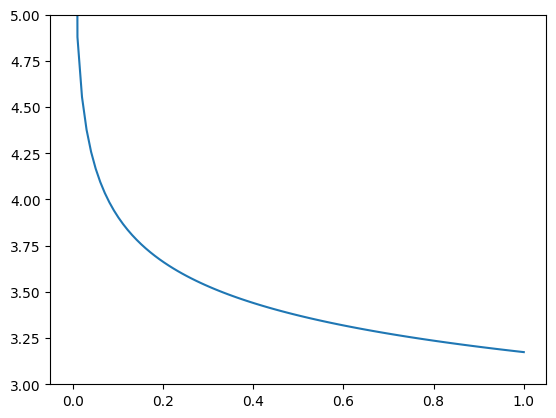

In [347]:
plt.plot(x, y, "-")
plt.ylim(3, 5)
plt.show()

-----

LaTeX Conversion and Solution
Here's the LaTeX conversion of the given Python code and the solution for x:

LaTeX Code:

\begin{cases}
c^2 = x^2 + y^2 \\
f = \frac{y}{x}
\end{cases}
Latex
Solution:


Solve eq2 for y:

From $f = \frac{y}{x}$, we get:

$y = fx$

Substitute y in eq1:

Substitute $y=fx$ in $c^2 = x^2 + y^2$:

$c^2 = x^2 + (fx)^2$

Simplify and solve for x^2:

$c^2 = x^2 + f^2x^2$

$c^2 = x^2(1 + f^2)$

$x^2 = \frac{c^2}{1+f^2}$

Solve for x:

$x = \pm \sqrt{\frac{c^2}{1+f^2}}$

Therefore, the solutions for x are:

$x = \sqrt{\frac{c^2}{1+f^2}}$ and $x = -\sqrt{\frac{c^2}{1+f^2}}$

Since $c > 0$

$x = \pm \frac{c}{\sqrt{1+f^2}}$


# Tests with 1/x

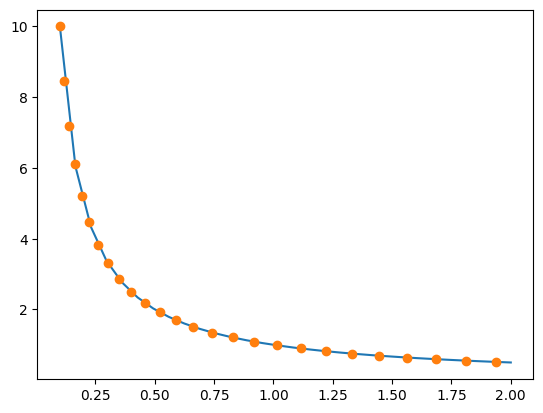

In [362]:
def f(x):
    return 1 / x

def grad_f(x):
    return -1 / x**2
    
x = np.linspace(0.1, 2, 30)
y = f(x)

c = 0.2  # "Segmentlänge"
x_samples = [x[0]]
while True:
    # dx = c / (1 + grad_f(x_samples[-1])**2)**0.5  # meins
    dx = c / (1 + np.abs(grad_f(x_samples[-1]))**0.5)  # Tims
    new_sample = x_samples[-1] + dx
    if new_sample > x[-1]:
        break
    x_samples.append(new_sample)
x_samples = np.array(x_samples)

plt.plot(x, y, "-")
plt.plot(x_samples, f(x_samples), "o")
plt.show()

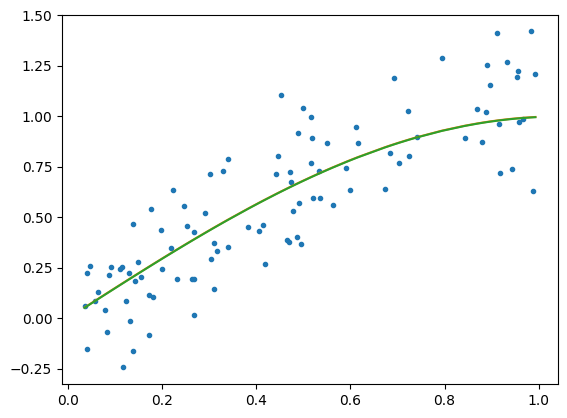

In [18]:
import numpy as np
import matplotlib.pyplot as plt


rng = np.random.default_rng()

f = lambda x: np.sin(1.5*x)
x = np.array(sorted(rng.random(100)))
y = f(x) + rng.normal(0, 0.2,100)

f_median = lambda x: f(x) + np.median(y - f(x))

plt.plot(x,y, ".")
plt.plot(x,f(x), "-")
plt.plot(x,f_median(x), "-")
plt.show()

In [19]:
n_above = np.sum(y > f(x))
n_below = np.sum(y < f(x))
print(f"{n_above} samples above {n_below} samples below")

n_above = np.sum(y > f_median(x))
n_below = np.sum(y < f_median(x))
print(f"{n_above} samples above {n_below} samples below")

49 samples above 51 samples below
50 samples above 50 samples below
